In [2]:
# <examples/doc_model_two_components.py>
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel
from lib.to_precision import to_precision
import lmfit
from sympy import *
import sympy
from sympy.solvers import solve
from sympy import Symbol
import math
import datetime
from ipywidgets import interact, FloatText, IntText, fixed, Text
now = lambda: str(datetime.datetime.now()).replace("-", "").replace(":", "").replace(" ", "_").split(".")[0]
import inspect

In [6]:
from uncertainties import unumpy as up
mm5_0 = [8.5, 6.25, 6.35, 9]
mm5_0err= [0.03, 0.03, 0.03, 0.03]
u_5mm_0 = up.uarray(mm5_0, mm5_0err)

mm5_1 = [8.6, 6.17, 6.4, 9]
mm5_1err= [0.03, 0.03, 0.03, 0.03]
u_5mm_1 = up.uarray(mm5_1, mm5_1err)

spy = [11.5, 19.15, 19.3, 8.15]
spy_err= [0.03, 0.03, 0.03, 0.03]
u_spy = up.uarray(spy, spy_err)

In [7]:
u_med_5mm = (u_5mm_0 + u_5mm_1)/2 
5/u_med_5mm * u_spy

array([6.725146198830409+/-0.02421149138626284,
       15.418679549114332+/-0.05794440603494698,
       15.137254901960784+/-0.055594825475965795,
       4.527777777777779+/-0.019790678446197044], dtype=object)

In [49]:
from uncertainties import ufloat
from uncertainties import unumpy as up

mm5_0 = [8.5, 6.25, 6.35, 9]
mm5_0err= [0.03, 0.03, 0.03, 0.03]
u_5mm_0 = up.uarray(mm5_0, mm5_0err)

mm5_1 = [8.6, 6.17, 6.4, 9]
mm5_1err= [0.03, 0.03, 0.03, 0.03]
u_5mm_1 = up.uarray(mm5_1, mm5_1err)

spy = [11.5, 19.15, 19.3, 8.15]
spy_err= [0.03, 0.03, 0.03, 0.03]
u_spy = up.uarray(spy, spy_err)

u_med_5mm = (u_5mm_0 + u_5mm_1)/2 
d_s = 5/u_med_5mm * u_spy

d_ = d_s[0]


slope_mid = (slope_0 + slope_1 + slope_2 + slope_3)/4


d_v_x0x1 = np.abs(1/(2*d_* slope_mid) * (squared_ux0[:-1] - squared_ux1[:-1]))
d_v_x0x2 = np.abs(1/(2*d_* slope_mid) * (squared_ux0[:-1] - squared_ux2))
d_v_x0x3 = np.abs(1/(2*d_* slope_mid) * (squared_ux0[:-1] - squared_ux3))
d_v_x1x2 = np.abs(1/(2*d_* slope_mid) * (squared_ux1[:-1] - squared_ux2))
d_v_x1x3 = np.abs(1/(2*d_* slope_mid) * (squared_ux1[:-1] - squared_ux3))
d_v_x2x3 = np.abs(1/(2*d_* slope_mid) * (squared_ux2 - squared_ux3))
print(
    r"$\Delta v_12 $" + "\t" + f"{np.mean(d_v_x0x1): .3}" + "\n"
    r"$\Delta v_13 $" + "\t" + f"{np.mean(d_v_x0x2): .3}" + "\n"
    r"$\Delta v_14 $" + "\t" + f"{np.mean(d_v_x0x3): .3}" + "\n"
    r"$\Delta v_23 $" + "\t" + f"{np.mean(d_v_x1x2): .3}" + "\n"
    r"$\Delta v_24 $" + "\t" + f"{np.mean(d_v_x1x3): .3}" + "\n"
    r"$\Delta v_34 $" + "\t" + f"{np.mean(d_v_x2x3): .3}" + "\n"
    # f"{}" + "\n"
    # f"{}" + "\n"
    )

$\Delta v_12 $	 0.00747+/-0.00074
$\Delta v_13 $	 0.0337+/-0.0008
$\Delta v_14 $	 0.0405+/-0.0008
$\Delta v_23 $	 0.0262+/-0.0008
$\Delta v_24 $	 0.0330+/-0.0008
$\Delta v_34 $	 0.00679+/-0.00086



In [11]:
# def get_Latex_Func(func):
#     # Get the source code of the function
#     source_lines = inspect.getsource(func).split('\n')

#     # Find the return statement
#     return_line = [line for line in source_lines if 'return' in line][0]

#     # Extract the expression after 'return'
#     expr = return_line.split('return')[1].strip()
    
#     tatex_func = sympy.latex(sympy.sympify(expr))
#     strg = (
#         "\\begin{align} \n \t f(x) = " + tatex_func + "\n" + "\end{align} \n"
#     )
#     return strg


def get_Latex_Func(func):
    # Get the source code of the function
    source_lines = inspect.getsource(func).split('\n')
    
    # Find the return statement
    return_line = [line for line in source_lines if 'return' in line][0].strip()
    
    # Extract the expression after 'return'
    expr = return_line.split('return')[1].strip()
    
    # Extract variable names from the function's signature
    
    sig = inspect.signature(func)
    param_names = list(sig.parameters.keys())
    
    # Create sympy symbols for all parameters
    symbols = sympy.symbols(' '.join(param_names))
    
    # Create a local dictionary of symbols
    local_dict = dict(zip(param_names, symbols))
    
    # Add numpy and math functions to the local dictionary
    local_dict.update({
        'sqrt': sympy.sqrt,
        'exp': sympy.exp,
        'pi': sympy.pi
    })
    
    # Convert the expression to a SymPy expression
    sympy_expr = sympy.parsing.sympy_parser.parse_expr(
        expr.replace('np.', '').replace('math.', ''), 
        local_dict=local_dict
    )
    
    # Convert to LaTeX
    tatex_func = sympy.latex(sympy_expr)
    
    strg = (
        "\\begin{align} \n \t f(" + ", ".join(param_names) + ") = " + tatex_func + "\n" + "\\end{align} \n"
    )
    return strg




def save_data_to_file(filename='data.pkl'):
    # Dictionary für Parameter-Werte erstellen
    data_dict = {"x":Daten.get_x(),"xerr":Daten.get_xerr(),"y":Daten.get_y(),"yerr":Daten.get_yerr(),"XName":Daten.get_XName(),"YName":Daten.get_YName()}
    # Konvertiere alle Numpy-Arrays im Dictionary in Listen
    # dict_serializable = {key: value.tolist() if isinstance(value, np.ndarray) else value 
    #                      for key, value in data_dict.items()}
    # __x = []
    # __y = []
    # __xerr = 0
    # __yerr = 0
    # __XName = "x"
    # __YName = "y"
    # __FileName = "dataset_1"

    # Parameter als JSON-Datei speichern
    with open(filename, 'wb') as f:
        pickle.dump(data_dict, f)
    print(f"Daten wurden in {filename} gespeichert.")

# Funktion zum Einlesen der Parameter aus einer JSON-Datei
def load_data_from_file(filename='params.pkl'):
    # JSON-Datei öffnen und die Werte lesen
    with open(filename, 'rb') as f:
        data_dict = pickle.load(f)
    
    # # Konvertiere Listen zurück in Numpy-Arrays
    # data_dict= {key: np.array(value) if isinstance(value, list) else value
    #                     for key, value in dict_with_arrays.items()}

    # Geladene Werte in die Parameter setzen
    Daten.set_x(data_dict.get("x"))
    Daten.set_xerr(data_dict.get("xerr"))
    Daten.set_y(data_dict.get("y"))
    Daten.set_yerr(data_dict.get("yerr"))
    Daten.set_XName(data_dict.get("XName"))
    Daten.set_YName(data_dict.get("YName"))

    print(f"Daten wurden aus {filename} geladen.")

def finish(x,y,result, string, y_err, yLabel, xLabel, var_func_bool= False):
    fig = plt.figure(figsize=(9,6), dpi=80)
    dynamic_resolution_array = np.arange(min(x),max(x), 0.001*abs(max(x)-min(x)))
    #plt.plot(x, y, 'skyblue')
    plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str(to_precision(result.result.redchi,3)))
    plt.errorbar(
        y = y, 
        x = x, 
        yerr = y_err,
        fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, label = r'Werte'
        ) #xerr = x_err, yerr = y_err, 
    plt.legend(loc='best')

    plt.ylabel(yLabel, fontsize=20)
    plt.xlabel(xLabel, fontsize=20)

    plt.legend(fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    string += Daten.get_Version()
    fig.savefig(string + "_Fit.pdf")
    plt.show()

    string_fig = "\\begin{figure}[ht] \n \t\\centering \n \t\\includegraphics[width= 0.65 \\textwidth]{Fits/" + string + "_Fit.pdf} \n" \
        + "\t\\caption{"+str(string)+", Fit} \n \t\\label{fig:"+str(string)+", Fit} \n\end{figure}"
    print(string_fig)

    text_file = open(string+"_params"+".tex", "w+", encoding="utf-8")
    string_fig += "\n \\\\ \n" 
    string_fig += get_Latex_Func(Daten.get_func()) if var_func_bool else ""
    string_fig += table_of_params(result)
    text_file.write(string_fig)
    text_file.close()

def table_of_params(result_of_fit):
    sig_num = 3
    string = "" + (
        "\\begin{table}[ht] \n"
        "\centering \n") +"\caption{" + str(Daten.get_FileName()) +", Fit Parameter Tabelle} \n"  + (
        "\label{tab:my-table}\n"
        "\\begin{tabular}{|l|c|}\n" 
        "\hline\n"
        "Parameter Name\t&\tWert \\\\ \hline\n"
    )
    for i in result_of_fit.params:
        str_param_val = f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}" 
        str_param_std = f"{float(result_of_fit.params[i].stderr): .{(len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num}}" 
        string += (
            str(i) + "\t&\t" +
            str_param_val +
            ("" if "." in str_param_val  else ".")+
            ("0"*((len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num+2 -len(f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}"))) +
            " \\pm "+ 
            str_param_std +
            ("" if "." in str_param_std else ".")+
            ("0"*((len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num+2-len(f"{float(result_of_fit.params[i].stderr): .{(len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num}}"))) +
            "\\\\ \hline\n"
        )
    string += (
        "\end{tabular} \n"
        "\end{table}"
    )
    return string


class Data:
    __x = []
    __y = []
    __xerr = 0
    __yerr = 0
    __XName = "x"
    __YName = "y"
    __FileName = "dataset_1",
    __Version = ""
    __pars = None
    __func = None
    
    def set_func(self, x):
        self.__func = x
        return
    def get_func(self):
        return self.__func

    def set_x(self, x):
        self.__x = x
        return  
    def set_y(self, x):
        self.__y = x
        return  
    def set_yerr(self, x):
        self.__yerr = x
        return  
    def set_xerr(self, x):
        self.__xerr = x
        return  
    
    def get_x(self):
        return self.__x
    def get_y(self):
        return self.__y
    def get_xerr(self):
        return self.__xerr
    def get_yerr(self):
        return self.__yerr
    
    def set_XName(self, x):
        self.__XName = rf"{x}"
        return
    def set_YName(self, x):
        self.__YName = rf"{x}"
        return
    def get_XName(self):
        return self.__XName
    def get_YName(self):
        return self.__YName
    
    def get_FileName(self):
        return self.__FileName
    
    def set_FileName(self, x):
        self.__FileName = f"{x}"
        return
    def set_Version(self, x):
        self.__Version = f"{x}"
        return
    def get_Version(self):
        return self.__Version
    
    def get_pars(self):
        return self.__pars
    def set_pars(self,x):
        self.__pars = x
        return

def import_Data(Datei:str="dataset_1", x_err_bool = False, y_err_bool = False, Daten=Data(), skip_lower:str="0", skip_upper:str="0", x_name:str="x", y_name:str="y", save_bool=False,Save:int=0,Load:int=0,switch_axes:bool=False,show_plot:bool=True):
    data = np.genfromtxt(Datei+".txt", skip_header = int(skip_upper), skip_footer = int(skip_lower))
    #data = np.genfromtxt(string+".txt", skip_header = 1, skip_footer = 18)

    if x_err_bool and y_err_bool:
        Daten.set_x(data[:,0])
        Daten.set_xerr(data[:, 1])
        Daten.set_y(data[:, 2])
        Daten.set_yerr(data[:, 3])
    elif x_err_bool and not y_err_bool:
        Daten.set_x(data[:,0])
        Daten.set_xerr(data[:, 1])
        Daten.set_y(data[:, 2])
        Daten.set_yerr(0)
    elif not x_err_bool and y_err_bool:
        Daten.set_x(data[:,0])
        Daten.set_xerr(0)
        Daten.set_y(data[:, 1])
        Daten.set_yerr(data[:, 2])
    elif not x_err_bool and not y_err_bool:
        Daten.set_x(data[:,0])
        Daten.set_xerr(0)
        Daten.set_y(data[:, 1])
        Daten.set_yerr(0)
    
    Daten.set_XName(x_name)
    Daten.set_YName(y_name)
    Daten.set_FileName(Datei)

    if switch_axes:
        temp = [Daten.get_x(), Daten.get_xerr()]
        Daten.set_x(Daten.get_y())
        Daten.set_xerr(Daten.get_yerr())
        Daten.set_y(temp[0])
        Daten.set_yerr(temp[1])
        
    if Save != 0:
        # Aufruf der Funktion zum Speichern
        save_data_to_file(f'{Daten.get_FileName()}_daten_{Save}.pkl')
    if Load != 0:
        # Aufruf der Funktion zum Laden
        load_data_from_file(f'{Daten.get_FileName()}_daten_{Load}.pkl')

    if show_plot:
        plt.errorbar(y = Daten.get_y(), yerr = Daten.get_yerr(), x = Daten.get_x(), xerr = Daten.get_xerr(), \
            fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
            label = r'Werte')
        plt.legend(loc='best')
        plt.ylabel(Daten.get_YName(), fontsize=20)
        plt.xlabel(Daten.get_XName(), fontsize=20)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.tight_layout()
        if save_bool:
            plt.savefig(Datei + f"_{Load}_Plot.pdf")
            string_fig = "\\begin{figure}[ht] \n \t\\centering \n \t\\includegraphics[width= 0.65 \\textwidth]{bilder/" + Datei + "_Plot.pdf} \n" \
                + "\t\\caption{"+str(Datei)+", Plot_log} \n \t\\label{fig:"+str(Datei)+", Plot_log} \n\end{figure}"
            print(string_fig)

        plt.show()



# Funktion zum Speichern der Parameter in einer JSON-Datei
def save_params_to_file(params, filename='params.json'):
    # Dictionary für Parameter-Werte erstellen
    params_dict = {name: param.value for name, param in params.items()}
    
    # Parameter als JSON-Datei speichern
    with open(filename, 'w') as f:
        json.dump(params_dict, f)
    print(f"Parameter wurden in {filename} gespeichert.")

# Funktion zum Einlesen der Parameter aus einer JSON-Datei
def load_params_from_file(params, filename='params.json'):
    # JSON-Datei öffnen und die Werte lesen
    with open(filename, 'r') as f:
        params_dict = json.load(f)

    # Geladene Werte in die Parameter setzen
    for name, value in params_dict.items():
        if name in params:
            params[name].value = value
        else:
            print(f"Warnung: Parameter {name} existiert nicht im aktuellen Modell.")

    print(f"Parameter wurden aus {filename} geladen.")

def update_model(Save:int=0, Load:int=0, **params):
    # Setze die Werte der Parameter
    for name, value in params.items():
        pars[name].value = value
    if Save != 0:
        # Aufruf der Funktion zum Speichern
        save_params_to_file(pars, f'{Daten.get_FileName()}_params_{Save}.json')
        Daten.set_Version(Save)
    if Load != 0:
        load_params_from_file(pars, f'{Daten.get_FileName()}_params_{Load}.json')
        Daten.set_Version(Load)

    # Berechne Modell mit aktuellen Parametern
    x = Daten.get_x()
    x_fit = np.arange(x.min(), x.max(), (x.max() - x.min())/10000)
    y_fit = mod.eval(pars, x=x_fit)

    # Plotten der Daten und des Modells
    plt.figure(figsize=(8, 6))
    plt.errorbar(y = Daten.get_y(), yerr = Daten.get_yerr(), x = Daten.get_x(), xerr = Daten.get_xerr(), \
        fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
        label = r'Werte')
    
    plt.plot(x_fit, y_fit, label="Modell", color='red')
    plt.legend()
    plt.ylabel(Daten.get_YName(), fontsize=20)
    plt.xlabel(Daten.get_XName(), fontsize=20)
    plt.title('Models')
    result = mod.fit(Daten.get_y(), pars, x=Daten.get_x())
    Daten.set_pars(result)
    dynamic_resolution_array = np.arange(min(Daten.get_x()),max(Daten.get_x()), 0.001*abs(max(Daten.get_x())-min(Daten.get_x())))
    plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'b-', label = r'Fit: reduced $\chi^2$ =  '+str(to_precision(result.result.redchi,3)))
    plt.tight_layout()
    plt.show()
    

## Interactive

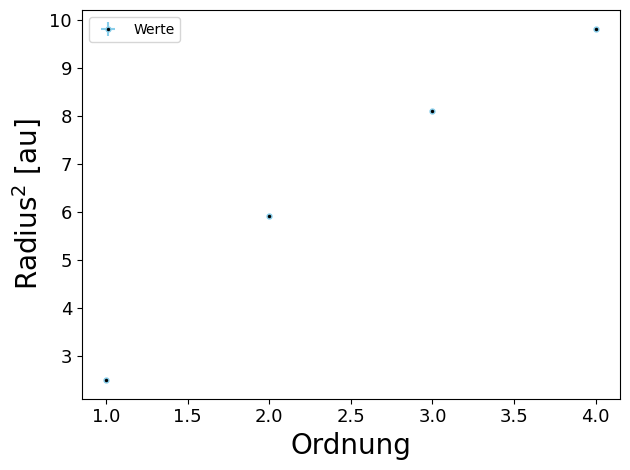

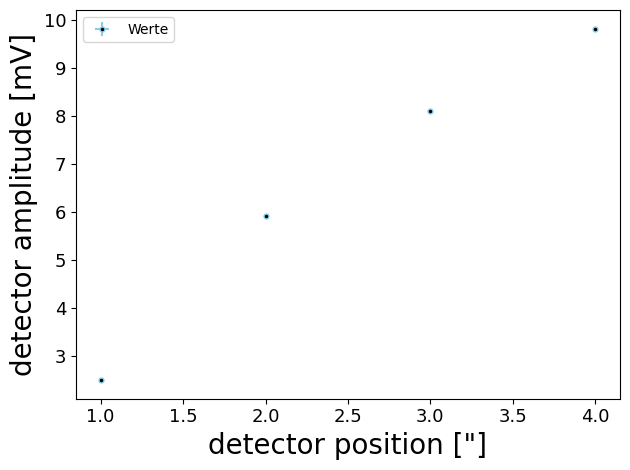

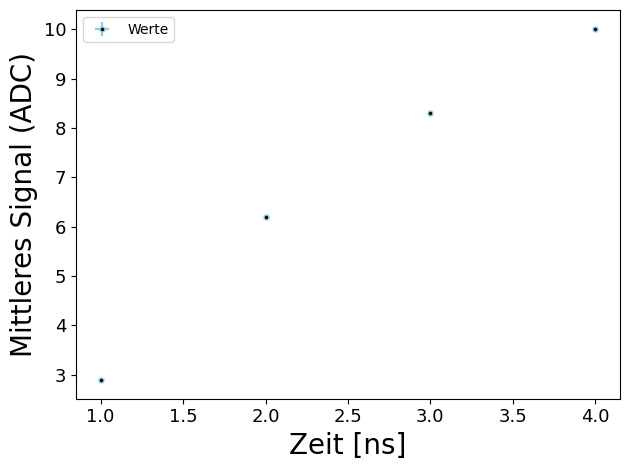

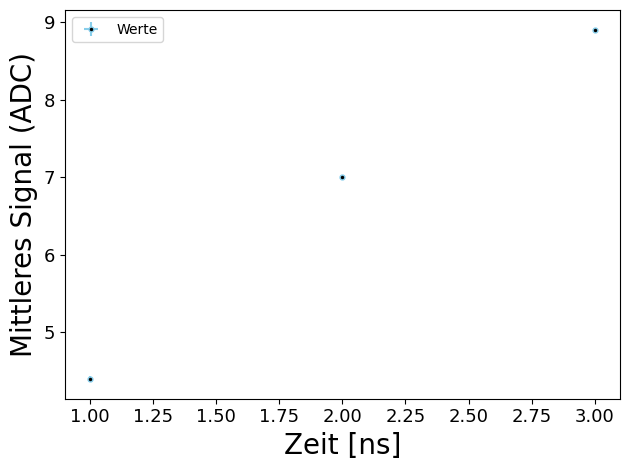

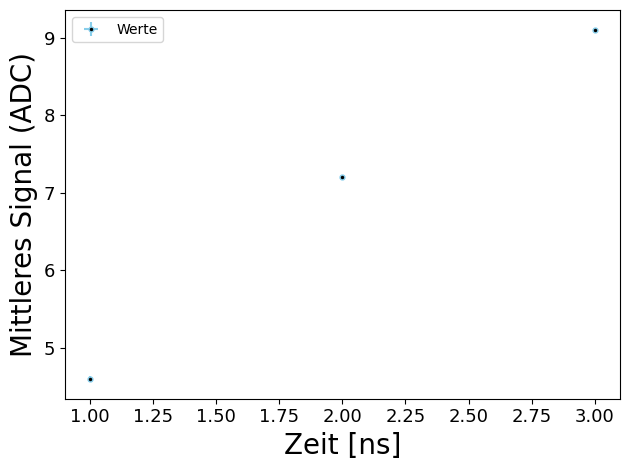

In [12]:
Daten = Data()

import_Data(Datei="messung1_Ring1", 
            x_err_bool = False, 
            y_err_bool = True, 
            x_name = "Ordnung", y_name = r"Radius$^2$ [au]",
            Daten=Daten, 
            skip_lower = "0",
            skip_upper = "1",
            save_bool = False,
            Save=0, Load=0
            )

Daten_0 = Data()

import_Data(Datei="messung1_Ring1", 
            x_err_bool = False, 
            y_err_bool = True, 
            x_name = "detector position [\"]", y_name = "detector amplitude [mV]",
            Daten=Daten_0, 
            skip_lower = "0",
            skip_upper = "1",
            save_bool = False,
            Save=0, Load=0
            )

Daten_1 = Data()

import_Data(Datei="messung1_Ring2", 
            x_err_bool = False, 
            y_err_bool = True, 
            x_name = "Zeit [ns]", y_name = "Mittleres Signal (ADC)", 
            Daten=Daten_1, 
            skip_lower = "0",
            skip_upper = "1",
            save_bool = False,
            Save=0, Load=0
            )
Daten_2 = Data()

import_Data(Datei="messung1_Ring3", 
            x_err_bool = False, 
            y_err_bool = True, 
            x_name = "Zeit [ns]", y_name = "Mittleres Signal (ADC)", 
            Daten=Daten_2, 
            skip_lower = "0",
            skip_upper = "1",
            save_bool = False,
            Save=0, Load=0
            )

Daten_3 = Data()

import_Data(Datei="messung1_Ring4", 
            x_err_bool = False, 
            y_err_bool = True, 
            x_name = "Zeit [ns]", y_name = "Mittleres Signal (ADC)", 
            Daten=Daten_3, 
            skip_lower = "0",
            skip_upper = "1",
            save_bool = False,
            Save=0, Load=0
            )



In [13]:
from uncertainties import unumpy as up

ux0 = up.uarray(Daten_0.get_y(), Daten_0.get_yerr())
ux1 = up.uarray(Daten_1.get_y(), Daten_1.get_yerr())
ux2 = up.uarray(Daten_2.get_y(), Daten_2.get_yerr())
ux3 = up.uarray(Daten_3.get_y(), Daten_3.get_yerr())

squared_ux0 = ux0**2
squared_ux1 = ux1**2
squared_ux2 = ux2**2
squared_ux3 = ux3**2

In [16]:
Daten_0.set_y([squared_ux0[m].n for m in range(len(squared_ux0))])
Daten_0.set_yerr([squared_ux0[m].s for m in range(len(squared_ux0))])

Daten_1.set_y([squared_ux1[m].n for m in range(len(squared_ux1))])
Daten_1.set_yerr([squared_ux1[m].s for m in range(len(squared_ux1))])

Daten_2.set_y([squared_ux2[m].n for m in range(len(squared_ux2))])
Daten_2.set_yerr([squared_ux2[m].s for m in range(len(squared_ux2))])

Daten_3.set_y([squared_ux3[m].n for m in range(len(squared_ux3))])
Daten_3.set_yerr([squared_ux3[m].s for m in range(len(squared_ux3))])

## Fit-Funktionen festlegen

In [17]:
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel, Model, VoigtModel, LinearModel

# import pylandau

# def plot_func(x, mpv=1, eta=1, sigma=1, A=1):
#     return pylandau.langau(x, mpv, eta, sigma, A)

def plot_func(x, sigma = 1, nu = 1, amplitude=1):
    return amplitude/(sigma*np.sqrt(2*math.pi))*np.exp(-1/2*((x-nu)/sigma)**2)

Daten.set_func(plot_func)
mod = LinearModel()

pars = mod.make_params()
pars

name,value,initial value,min,max,vary
slope,1.00000000,None,-inf,inf,True
intercept,0.00000000,None,-inf,inf,True


In [18]:
def finish(x,y,result, string, y_err, yLabel, xLabel, var_func_bool= False):
    fig = plt.figure(figsize=(9,6), dpi=80)
    dynamic_resolution_array = np.arange(min(x),max(x), 0.001*abs(max(x)-min(x)))
    #plt.plot(x, y, 'skyblue')
    plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str(to_precision(result.result.redchi,3)) + f"\nSteigung: {result.params['slope'].value: 0.3}" + r" $\pm$" + f"{result.params['slope'].stderr: 0.3}")
    plt.errorbar(
        y = y, 
        x = x, 
        yerr = y_err,
        fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, label = r'Werte'
        ) #xerr = x_err, yerr = y_err, 
    plt.legend(loc='best')

    plt.ylabel(yLabel, fontsize=20)
    plt.xlabel(xLabel, fontsize=20)

    plt.legend(fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    string += Daten.get_Version()
    fig.savefig(string + "_Fit.pdf")
    plt.show()

    string_fig = "\\begin{figure}[ht] \n \t\\centering \n \t\\includegraphics[width= 0.65 \\textwidth]{Fits/" + string + "_Fit.pdf} \n" \
        + "\t\\caption{"+str(string)+", Fit} \n \t\\label{fig:"+str(string)+", Fit} \n\end{figure}"
    print(string_fig)

    text_file = open(string+"_params"+".tex", "w+", encoding="utf-8")
    string_fig += "\n \\\\ \n" 
    string_fig += get_Latex_Func(Daten.get_func()) if var_func_bool else ""
    string_fig += table_of_params(result)
    text_file.write(string_fig)
    text_file.close()

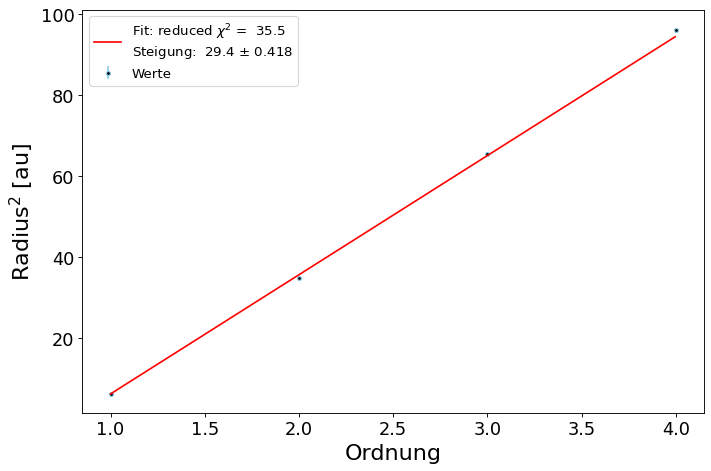

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/messung1_Ring1_Fit.pdf} 
	\caption{messung1_Ring1, Fit} 
 	\label{fig:messung1_Ring1, Fit} 
\end{figure}


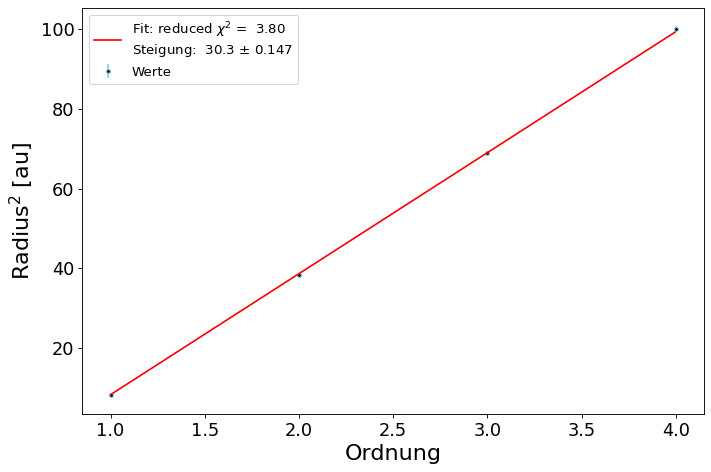

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/messung1_Ring2_Fit.pdf} 
	\caption{messung1_Ring2, Fit} 
 	\label{fig:messung1_Ring2, Fit} 
\end{figure}


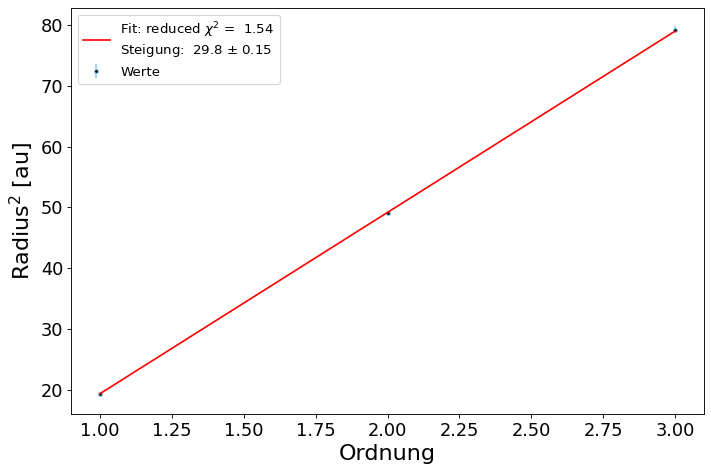

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/messung1_Ring3_Fit.pdf} 
	\caption{messung1_Ring3, Fit} 
 	\label{fig:messung1_Ring3, Fit} 
\end{figure}


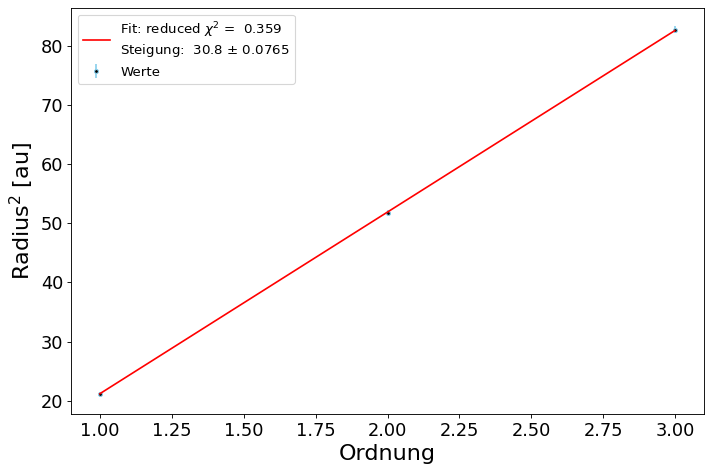

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/messung1_Ring4_Fit.pdf} 
	\caption{messung1_Ring4, Fit} 
 	\label{fig:messung1_Ring4, Fit} 
\end{figure}


In [19]:
result_0 = mod.fit(Daten_0.get_y(), pars, x=Daten_0.get_x(), weights = 1/((np.array(Daten_0.get_yerr()))**2))
finish(Daten_0.get_x(),Daten_0.get_y(),result_0, Daten_0.get_FileName(), Daten_0.get_yerr(), Daten.get_YName(), Daten.get_XName())

result_1 = mod.fit(Daten_1.get_y(), pars, x=Daten_1.get_x(), weights = 1/((np.array(Daten_1.get_yerr()))**2))
finish(Daten_1.get_x(),Daten_1.get_y(),result_1, Daten_1.get_FileName(), Daten_1.get_yerr(), Daten.get_YName(), Daten.get_XName())

result_2 = mod.fit(Daten_2.get_y(), pars, x=Daten_2.get_x(), weights = 1/((np.array(Daten_2.get_yerr()))**2))
finish(Daten_2.get_x(),Daten_2.get_y(),result_2, Daten_2.get_FileName(), Daten_2.get_yerr(), Daten.get_YName(), Daten.get_XName())

result_3 = mod.fit(Daten_3.get_y(), pars, x=Daten_3.get_x(), weights = 1/((np.array(Daten_3.get_yerr()))**2))
finish(Daten_3.get_x(),Daten_3.get_y(),result_3, Daten_3.get_FileName(), Daten_3.get_yerr(), Daten.get_YName(), Daten.get_XName())

In [20]:
print(result_0.params["slope"].value, "+-", result_0.params["slope"].stderr )
print(result_1.params["slope"].value, "+-", result_1.params["slope"].stderr )
print(result_2.params["slope"].value, "+-", result_2.params["slope"].stderr )
print(result_3.params["slope"].value, "+-", result_3.params["slope"].stderr )

29.440902804545427 +- 0.41779944135804264
30.294129352257112 +- 0.14673137815024503
29.821552666027227 +- 0.15009124972498564
30.773522566487326 +- 0.07653176479381364


In [21]:
from uncertainties import ufloat
slope_0 = ufloat(result_0.params["slope"].value, result_0.params["slope"].stderr)
slope_1 = ufloat(result_1.params["slope"].value, result_1.params["slope"].stderr)
slope_2 = ufloat(result_2.params["slope"].value, result_2.params["slope"].stderr)
slope_3 = ufloat(result_3.params["slope"].value, result_3.params["slope"].stderr)
slope_mid = (slope_0 + slope_1 + slope_2 + slope_3)/4
slope_mid

30.082526847329273+/-0.11844591719415298

In [ ]:
slope_mid = (slope_0 + slope_1 + slope_2 + slope_3)/4

d_ = d_1

d_v_x0x1 = np.abs(1/(2*d_* slope_mid) * (squared_ux0[:-1] - squared_ux1[:-1]))
d_v_x0x2 = np.abs(1/(2*d_* slope_mid) * (squared_ux0[:-1] - squared_ux2))
d_v_x0x3 = np.abs(1/(2*d_* slope_mid) * (squared_ux0[:-1] - squared_ux3))
d_v_x1x2 = np.abs(1/(2*d_* slope_mid) * (squared_ux1[:-1] - squared_ux2))
d_v_x1x3 = np.abs(1/(2*d_* slope_mid) * (squared_ux1[:-1] - squared_ux3))
d_v_x2x3 = np.abs(1/(2*d_* slope_mid) * (squared_ux2 - squared_ux3))
print(
    r"$\Delta v_12 $  \t" + f"{np.mean(d_v_x0x1): .3}" + "\n"
    r"$\Delta v_13 $  \t" + f"{np.mean(d_v_x0x2): .3}" + "\n"
    r"$\Delta v_14 $  \t" + f"{np.mean(d_v_x0x3): .3}" + "\n"
    r"$\Delta v_23 $  \t" + f"{np.mean(d_v_x1x2): .3}" + "\n"
    r"$\Delta v_24 $  \t" + f"{np.mean(d_v_x1x3): .3}" + "\n"
    r"$\Delta v_34 $  \t" + f"{np.mean(d_v_x2x3): .3}" + "\n"
    # f"{}" + "\n"
    # f"{}" + "\n"
    )

$\Delta v_12 $  \t 0.00747+/-0.00074
$\Delta v_13 $  \t 0.0337+/-0.0008
$\Delta v_14 $  \t 0.0405+/-0.0008
$\Delta v_23 $  \t 0.0262+/-0.0008
$\Delta v_24 $  \t 0.0330+/-0.0008
$\Delta v_34 $  \t 0.00679+/-0.00086



In [ ]:

sig_num = 3
string = "" + (
    "\\begin{table}[ht] \n"
    "\centering \n") +"\caption{" + str(Daten.get_FileName()) +", Fit Parameter Tabelle} \n"  + (
    "\label{tab:my-table}\n"
    "\\begin{tabular}{|l|c|}\n" 
    "\hline\n"
    "Parameter Name\t&\tWert \\\\ \hline\n"
)
for i in result_of_fit.params:
    str_param_val = f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}" 
    str_param_std = f"{float(result_of_fit.params[i].stderr): .{(len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num}}" 
    string += (
        str(i) + "\t&\t" +
        str_param_val +
        ("" if "." in str_param_val  else ".")+
        ("0"*((len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num+2 -len(f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}"))) +
        " \\pm "+ 
        str_param_std +
        ("" if "." in str_param_std else ".")+
        ("0"*((len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num+2-len(f"{float(result_of_fit.params[i].stderr): .{(len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num}}"))) +
        "\\\\ \hline\n"
    )
string += (
    "\end{tabular} \n"
    "\end{table}"
)
string

## Parameter Festlegen

In [5]:
# Funktion zum Speichern der Parameter in einer JSON-Datei
def save_params_to_file(params, filename='params.json'):
    # Dictionary für Parameter-Werte erstellen
    params_dict = {name: param.value for name, param in params.items()}
    
    # Parameter als JSON-Datei speichern
    with open(filename, 'w') as f:
        json.dump(params_dict, f)
    print(f"Parameter wurden in {filename} gespeichert.")

# Funktion zum Einlesen der Parameter aus einer JSON-Datei
def load_params_from_file(params, filename='params.json'):
    # JSON-Datei öffnen und die Werte lesen
    with open(filename, 'r') as f:
        params_dict = json.load(f)

    # Geladene Werte in die Parameter setzen
    for name, value in params_dict.items():
        if name in params:
            params[name].value = value
        else:
            print(f"Warnung: Parameter {name} existiert nicht im aktuellen Modell.")

    print(f"Parameter wurden aus {filename} geladen.")

def update_model(Save:int=0, Load:int=0, **params):
    # Setze die Werte der Parameter
    for name, value in params.items():
        pars[name].value = value
    if Save != 0:
        # Aufruf der Funktion zum Speichern
        save_params_to_file(pars, f'{Daten.get_FileName()}_params_{Save}.json')
        Daten.set_Version(Save)
    if Load != 0:
        load_params_from_file(pars, f'{Daten.get_FileName()}_params_{Load}.json')
        Daten.set_Version(Load)

    # Berechne Modell mit aktuellen Parametern
    x = Daten.get_x()
    x_fit = np.arange(x.min(), x.max(), (x.max() - x.min())/10000)
    y_fit = mod.eval(pars, x=x_fit)

    # Plotten der Daten und des Modells
    plt.figure(figsize=(8, 6))
    plt.errorbar(y = Daten.get_y(), yerr = Daten.get_yerr(), x = Daten.get_x(), xerr = Daten.get_xerr(), \
        fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
        label = r'Werte')
    
    plt.plot(x_fit, y_fit, label="Modell", color='red')
    plt.legend()
    plt.ylabel(Daten.get_YName(), fontsize=20)
    plt.xlabel(Daten.get_XName(), fontsize=20)
    plt.title('Models')
    result = mod.fit(Daten.get_y(), pars, x=Daten.get_x())
    Daten.set_pars(result)
    dynamic_resolution_array = np.arange(min(Daten.get_x()),max(Daten.get_x()), 0.001*abs(max(Daten.get_x())-min(Daten.get_x())))
    plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'b-', label = r'Fit: reduced $\chi^2$ =  '+str(to_precision(result.result.redchi,3)))
    plt.tight_layout()
    plt.show()
    

In [6]:
param_widgets = {}
for param_name, param in pars.items():
    param_widgets[param_name] = IntText(value=param.value,
                                            step=0.1,
                                            description=param_name)

# Interaktive Anzeige mit automatisch generierten Slidern
interact(update_model, Save=IntText(value=0), Load=IntText(value=0), **param_widgets)
print()

interactive(children=(IntText(value=0, description='Save'), IntText(value=0, description='Load'), IntText(valu…

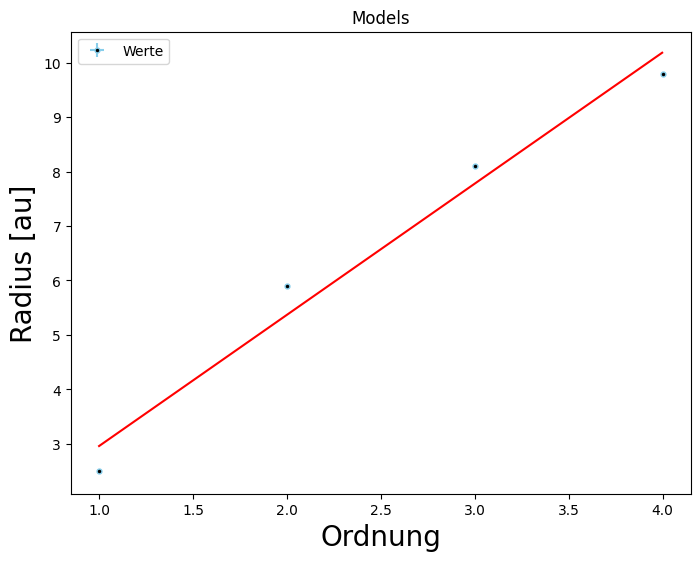

In [7]:
result = mod.fit(Daten.get_y(), pars, x=Daten.get_x())
dynamic_resolution_array = np.arange(min(Daten.get_x()),max(Daten.get_x()), 0.001*abs(max(Daten.get_x())-min(Daten.get_x())))

plt.figure(figsize=(8, 6))
plt.errorbar(y = Daten.get_y(), yerr = Daten.get_yerr(), x = Daten.get_x(), xerr = Daten.get_xerr(), \
    fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, \
    label = r'Werte')

#plt.plot(x_fit, y_fit, label="Modell", color='red')
plt.legend()
plt.ylabel(Daten.get_YName(), fontsize=20)
plt.xlabel(Daten.get_XName(), fontsize=20)
plt.title('Models')

plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str(to_precision(result.result.redchi,3)))

plt.show()

In [16]:
Daten.get_pars()

In [17]:
Daten.get_yerr()

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 2. , 2. , 3. ,
       4. , 4. , 4. , 4. , 4. , 3. , 2. , 2. , 1. , 1. , 1. , 1. ])

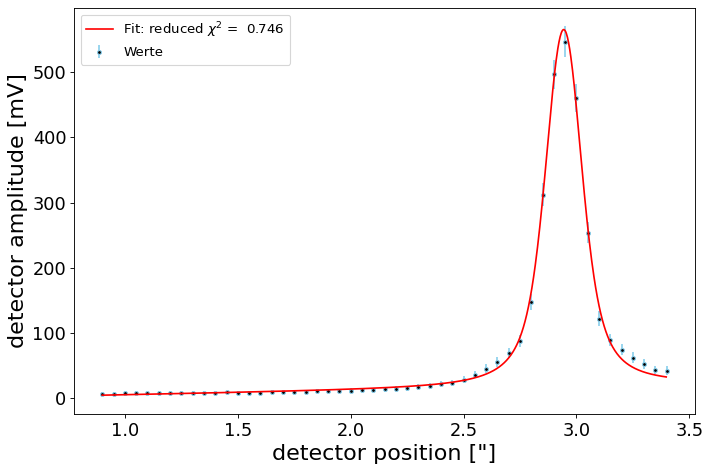

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/Amps_B0A_Fit.pdf} 
	\caption{Amps_B0A, Fit} 
 	\label{fig:Amps_B0A, Fit} 
\end{figure}


In [39]:
weights = 1/np.sqrt(Daten.get_y())
weights[weights == np.inf] = 0
Daten.set_yerr(np.sqrt(Daten.get_y()))

result = mod.fit(Daten.get_y(), pars, x=Daten.get_x(), weights = weights)
finish(Daten.get_x(),Daten.get_y(),result, Daten.get_FileName(), Daten.get_yerr(), Daten.get_YName(), Daten.get_XName())

In [40]:
result

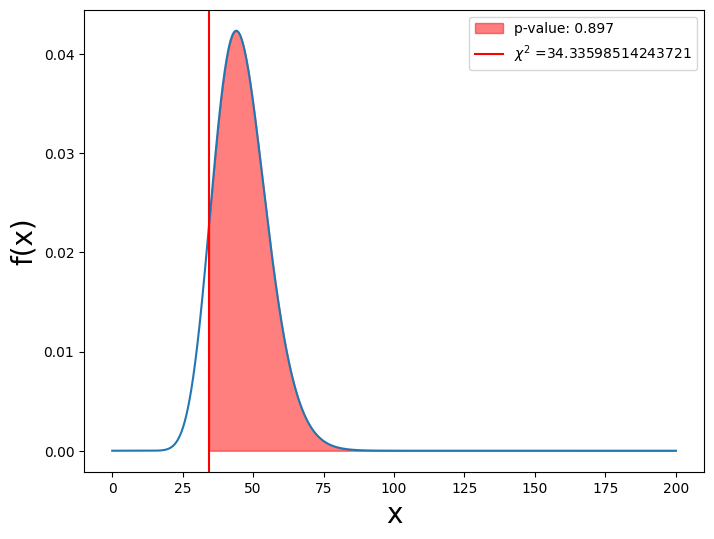

(0.897280458042388, 4.5680975355201955e-10)

In [41]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

def integrand(x, deg):
    return chi2(deg).pdf(x)

chi2_fit = result.chisqr
red_chi2 = result.redchi
deg = chi2_fit/red_chi2
p_val = quad(integrand, chi2_fit , np.inf, args = (deg))

x = np.arange(0,200, 0.01)

plt.figure(figsize=(8, 6))
plt.ylabel(r"f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.plot(x, integrand(x, deg))
# Fill Integral area:
section = np.arange(chi2_fit, np.max(x), 0.01)
plt.fill_between(section, integrand(section, deg), color = "r", alpha = 0.5, label = f"p-value: {p_val[0]:.3}")
plt.axvline(chi2_fit, color = "r", label=r"$\chi^2$ =" +  f"{chi2_fit}")
plt.legend()
plt.savefig(f"{Daten.get_FileName()}_Pval{p_val[0]:.3}_chi2{chi2_fit}.pdf")
plt.show()
p_val

# Convolution

In [42]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from sympy import Symbol
from sympy.parsing.sympy_parser import parse_expr
from sympy import symbols, lambdify
x_val, x_= symbols("x_val, x_")
import scipy


In [43]:
result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,142.336357,2.92632506,(2.06%),1000,-inf,inf,True,
center,2.94344771,0.00191267,(0.06%),3,-inf,inf,True,
sigma,0.05416051,0.00133543,(2.47%),1,0.00000000,inf,True,
slope,6.54018457,0.95473602,(14.60%),1,-inf,inf,True,
intercept,-2.12863286,1.55651566,(73.12%),0,-inf,inf,True,
gamma,0.05416051,0.00133543,(2.47%),1,-inf,inf,False,sigma
fwhm,0.19504774,0.00480928,(2.47%),3.6012906381881353,-inf,inf,False,1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)
height,548.497766,14.2000529,(2.59%),208.7092805203677,-inf,inf,False,"(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*real(wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))))"


In [44]:
result.params["amplitude"].value
result.params["sigma"].value
result.params["center"].value
result.params["gamma"].value
 
def h(x):
    z = (x-result.params["center"].value+result.params["gamma"].value * 1j)/(np.sqrt(2)*result.params["sigma"].value)
    return (result.params["amplitude"].value*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z)))/(np.sqrt(2*np.pi)*result.params["sigma"].value)

In [45]:
result.params["amplitude"].value,result.params["sigma"].value,result.params["center"].value,result.params["gamma"].value


(142.3363574064359,
 0.054160510030471176,
 2.943447713559997,
 0.054160510030471176)

In [46]:
amplitude, sigma, center, gamma = 142.3363574064359, 0.054160510030471176, 2.943447713559997, 0.054160510030471176

In [47]:
def integrand(a, b):
    return a*(b**3) *scipy.exp(-1/b)

# chi2_fit = result.chisqr
# red_chi2 = result.redchi
# deg = chi2_fit/red_chi2
integral =lambda b:quad(integrand, -1, scipy.inf, args = (b))
integral(20)

C:\Users\tlock\AppData\Local\Temp\ipykernel_12872\1304330177.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*(b**3) *scipy.exp(-1/b)
C:\Users\tlock\AppData\Local\Temp\ipykernel_12872\1304330177.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral =lambda b:quad(integrand, -1, scipy.inf, args = (b))


(11414.753082155767, 0.03132960094262671)

In [48]:
np.real(1+result.params["gamma"].value * 1j)

1.0

C:\Users\tlock\AppData\Local\Temp\ipykernel_12872\4285284313.py:8: RuntimeWarning: invalid value encountered in multiply
  return (result.params["amplitude"].value*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z)))/(np.sqrt(2*np.pi)*result.params["sigma"].value)


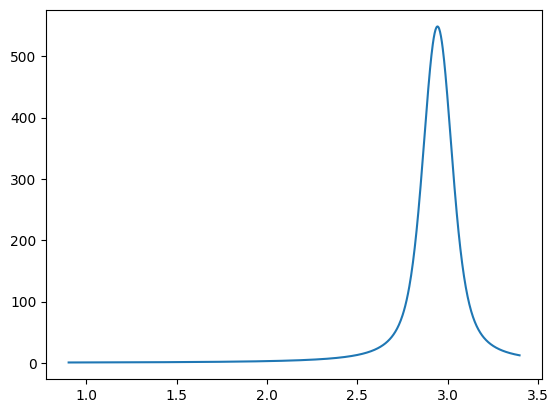

In [49]:
plt.plot(dynamic_resolution_array,h(dynamic_resolution_array))

In [50]:
def R(x:np.ndarray):
    z = (x-result.params["center"].value+result.params["gamma"].value * 1j)/(np.sqrt(2)*result.params["sigma"].value)
    y = (result.params["amplitude"].value*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z)))/(np.sqrt(2*np.pi)*result.params["sigma"].value)
    # if y == np.inf:
    #     return 0
    # else:
    return y 

def B(I):
    return 0.62941*I+0.14196*I**2-0.10654*I**3

def dB(I):
    return 174.42 * B(I)

def T(Ohm):
    return

def h_pos(z,g):
    I = 0.5 # Stromstärke Magnet
    d1 = 10.16e-2
    d2 = 60.66e-2 - d1
    k = 1.380649e-23
    T = 170+273.15
    mu_b = 9.2740100783e-24
    cm_umrechnung = 2.54e-3
    z_0 = +1/2*mu_b*dB(I)*d1*(d2+d1/2)/k*T*g*cm_umrechnung
    a = z/z_0
    return 1/(a**3) *np.exp(-1/a)

def integrand(a, b, g):
    return R(b-a) * h_pos(a, g)

integral = lambda b, g:quad(integrand, -100, 100, args = (b, g))
integral(1, 2)

ZeroDivisionError: float division by zero

In [51]:
from scipy.integrate import quad
import numpy as np

# Beispielhafte Definition von R und h_pos (falls nicht definiert)
def R(x:np.ndarray):
    z = (x-result.params["center"].value+result.params["gamma"].value * 1j)/(np.sqrt(2)*result.params["sigma"].value)
    y = (result.params["amplitude"].value*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z)))/(np.sqrt(2*np.pi)*result.params["sigma"].value)
    # if y == np.inf:
    #     return 0
    # else:
    return y 

def B(I):
    return 0.62941*I+0.14196*I**2-0.10654*I**3

def dB(I):
    return 174.42 * B(I)

def T(Ohm):
    return

def h_pos(z,g):
    I = 0.5 # Stromstärke Magnet
    d1 = 10.16e-2
    d2 = 60.66e-2 - d1
    k = 1.380649e-23
    T = 170+273.15
    mu_b = 9.2740100783e-24
    cm_umrechnung = 2.54e-3
    z_0 = +1/2*mu_b*dB(I)*d1*(d2+d1/2)/k*T*g*cm_umrechnung
    a = z/z_0
    return 1/(a**3) *np.exp(-1/a)

# Integrand mit Korrektur
def integrand(a, b, g):
    return R(b - a) * h_pos(a, g)

# Lambda-Funktion für das Integral
integral = lambda b, g: quad(integrand, 0, 10, args=(b, g))

# Beispielaufruf
b_ = 1
g_ = 0.5
result_, error = integral(b_, g_)

print("Ergebnis:", result)
print("Fehlerabschätzung:", error)


Ergebnis: <lmfit.model.ModelResult object at 0x0000017A95D02F90>
Fehlerabschätzung: nan


C:\Users\tlock\AppData\Local\Temp\ipykernel_12872\3491283100.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  y = (result.params["amplitude"].value*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z)))/(np.sqrt(2*np.pi)*result.params["sigma"].value)
C:\Users\tlock\AppData\Local\Temp\ipykernel_12872\3491283100.py:39: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = lambda b, g: quad(integrand, 0, 10, args=(b, g))


In [ ]:
import numpy as np
import scipy.special

def B(I):
    return 0.62941*I+0.14196*I**2-0.10654*I**3

def dB(I):
    return 174.42 * B(I)

def T(Ohm):
    return

# Beispiel für das R(x) mit Fehlerbehandlung
def R(x: np.ndarray):
    try:
        z = (x - result.params["center"].value + result.params["gamma"].value * 1j) / (np.sqrt(2) * result.params["sigma"].value)
        y = (result.params["amplitude"].value * np.real(np.exp(-z**2) * scipy.special.erfc(-1j * z))) / (np.sqrt(2 * np.pi) * result.params["sigma"].value)
        
        # Fehlerbehandlung: Wenn der Wert zu groß oder NaN ist, setze ihn auf 0
        if np.any(np.isnan(y)) or np.any(np.isinf(y)):
            return np.zeros_like(y)
        return y
    except Exception as e:
        print(f"Fehler in R(x): {e}")
        return np.zeros_like(x)  # Rückgabe von 0 bei Fehlern

# Beispiel für die h_pos(z, g) mit Fehlerbehandlung
def h_pos(z, g):
    try:
        I = 0.5  # Stromstärke Magnet
        d1 = 10.16e-2
        d2 = 60.66e-2 - d1
        k = 1.380649e-23
        T = 170 + 273.15
        mu_b = 9.2740100783e-24
        cm_umrechnung = 2.54e-3
        z_0 = +1 / 2 * mu_b * dB(I) * d1 * (d2 + d1 / 2) / (k * T) * g #* cm_umrechnung
        
        if z_0 == 0:
            return 0  # Verhindern, dass Division durch 0 auftritt
        
        a = z / z_0
        
        # Wenn a zu groß wird, kann es numerische Probleme geben
        if np.abs(a) > 1e6:
            return 0  # Rückgabe von 0, wenn a zu groß wird

        return 1 / (a**3) * np.exp(-1 / a)
    except Exception as e:
        print(f"Fehler in h_pos(z, g): {e}")
        return 0  # Rückgabe von 0 bei Fehlern
    
def h_neg(z, g):
    try:
        I = 0.5  # Stromstärke Magnet
        d1 = 10.16e-2
        d2 = 60.66e-2 - d1
        k = 1.380649e-23
        T = 170 + 273.15
        mu_b = 9.2740100783e-24
        cm_umrechnung = 2.54e-3
        z_0 = -1 / 2 * mu_b * dB(I) * d1 * (d2 + d1 / 2) / (k * T) * g #* cm_umrechnung
        
        if z_0 == 0:
            return 0  # Verhindern, dass Division durch 0 auftritt
        
        a = z / z_0
        
        # Wenn a zu groß wird, kann es numerische Probleme geben
        if np.abs(a) > 1e6:
            return 0  # Rückgabe von 0, wenn a zu groß wird

        return 1 / (a**3) * np.exp(-1 / a)
    except Exception as e:
        print(f"Fehler in h_pos(z, g): {e}")
        return 0  # Rückgabe von 0 bei Fehlern
    
# Integrand mit Korrektur
def integrand(a, b, g):
    return R(b - a) * h_pos(a, g)

def integrand_neg(a, b, g):
    return R(b - a) * h_neg(a, g)

# Lambda-Funktion für das Integral
integral = lambda b, g: quad(integrand, -np.inf, 1000, args=(b, g))
integral_neg = lambda b, g: quad(integrand_neg, -1000, 1000, args=(b, g))
# Beispielaufruf
b_ = 1
g_ = 2
result_, error = integral(b_, g_)

print("Ergebnis:", result_)
print("Fehlerabschätzung:", error)


Fehler in h_pos(z, g): float division by zero
Ergebnis: 0.0
Fehlerabschätzung: 0.0


C:\Users\tlock\AppData\Local\Temp\ipykernel_12872\104774830.py:17: RuntimeWarning: invalid value encountered in scalar multiply
  y = (result.params["amplitude"].value * np.real(np.exp(-z**2) * scipy.special.erfc(-1j * z))) / (np.sqrt(2 * np.pi) * result.params["sigma"].value)


In [63]:
y_vals = []
y_vals_neg = []
for value in dynamic_resolution_array:
    y_vals.append(integral(value, 2))
    y_vals_neg.append(integral_neg(value, 2))

    

C:\Users\tlock\AppData\Local\Temp\ipykernel_12872\104774830.py:17: RuntimeWarning: invalid value encountered in scalar multiply
  y = (result.params["amplitude"].value * np.real(np.exp(-z**2) * scipy.special.erfc(-1j * z))) / (np.sqrt(2 * np.pi) * result.params["sigma"].value)


Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float division by zero
Fehler in h_pos(z, g): float divis

In [64]:
np.array(y_vals)[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

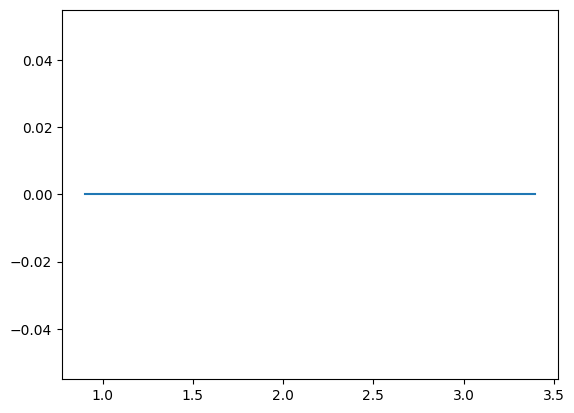

In [65]:
plt.plot(dynamic_resolution_array, np.array(y_vals)[:,0])


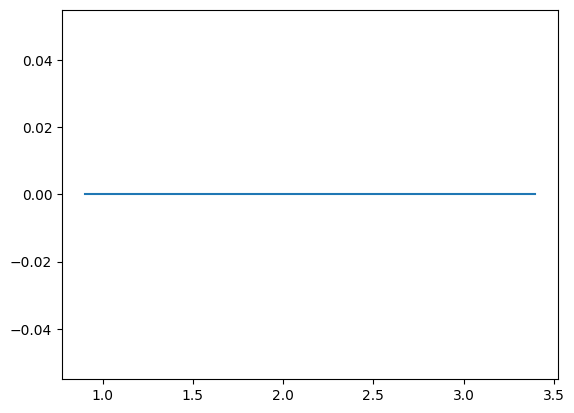

In [66]:
plt.plot(dynamic_resolution_array, np.array(y_vals_neg)[:,0])

C:\Users\tlock\AppData\Local\Temp\ipykernel_21804\2227131761.py:3: RuntimeWarning: invalid value encountered in multiply
  y = (result.params["amplitude"].value*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z)))/(np.sqrt(2*np.pi)*result.params["sigma"].value)


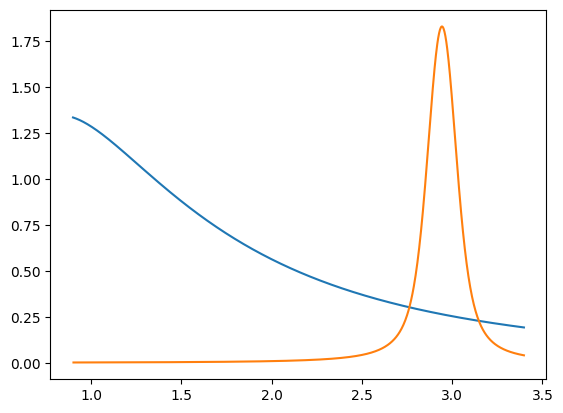

In [106]:
plt.plot(dynamic_resolution_array, h_pos(dynamic_resolution_array, 2))
plt.plot(dynamic_resolution_array, R(dynamic_resolution_array)*1/300)

In [83]:
b = 3.3
g = 2
quad(integrand, -np.inf, np.inf, args = (b, g))

C:\Users\tlock\AppData\Local\Temp\ipykernel_21804\3749915835.py:26: RuntimeWarning: overflow encountered in exp
  return 1/(a**3) *np.exp(-1/a)
C:\Users\tlock\AppData\Local\Temp\ipykernel_21804\3749915835.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  y = (result.params["amplitude"].value*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z)))/(np.sqrt(2*np.pi)*result.params["sigma"].value)
C:\Users\tlock\AppData\Local\Temp\ipykernel_21804\3675667626.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad(integrand, -np.inf, np.inf, args = (b, g))


(nan, nan)

In [ ]:
y = R(dynamic_resolution_array)
y[y == np.inf] = 0
y

2.209842097730547

In [69]:
def R(x:np.ndarray):
    z = (x-result.params["center"].value+result.params["gamma"].value * 1j)/(np.sqrt(2)*result.params["sigma"].value)
    y = (result.params["amplitude"].value*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z)))/(np.sqrt(2*np.pi)*result.params["sigma"].value)
    if y == np.inf:
        return 0
    else:
        return y 
def h(x):
    x_0 = 0 #hier weiter
    a = x/x_0
    return 1/(a**3) *np.exp(-1/a)

def integrand(a, b):
    return R(b-a)

integral = lambda b:quad(integrand, 0, 5, args = (b))
for i in np.arange(0, 5, 0.1):
    print(integral(i))

C:\Users\tlock\AppData\Local\Temp\ipykernel_21804\2610142190.py:3: RuntimeWarning: invalid value encountered in scalar multiply
  y = (result.params["amplitude"].value*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z)))/(np.sqrt(2*np.pi)*result.params["sigma"].value)
C:\Users\tlock\AppData\Local\Temp\ipykernel_21804\2610142190.py:16: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = lambda b:quad(integrand, 0, 5, args = (b))


(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)
(nan, nan)


In [32]:
b = symbols("b")

plt.plot(dynamic_resolution_array, integral(lambdify(b, dynamic_resolution_array)))

NotImplementedError: unhandled type: <class 'numpy.ndarray'>, [0.9    0.9025 0.905  0.9075 0.91   0.9125 0.915  0.9175 0.92   0.9225
 0.925  0.9275 0.93   0.9325 0.935  0.9375 0.94   0.9425 0.945  0.9475
 0.95   0.9525 0.955  0.9575 0.96   0.9625 0.965  0.9675 0.97   0.9725
 0.975  0.9775 0.98   0.9825 0.985  0.9875 0.99   0.9925 0.995  0.9975
 1.     1.0025 1.005  1.0075 1.01   1.0125 1.015  1.0175 1.02   1.0225
 1.025  1.0275 1.03   1.0325 1.035  1.0375 1.04   1.0425 1.045  1.0475
 1.05   1.0525 1.055  1.0575 1.06   1.0625 1.065  1.0675 1.07   1.0725
 1.075  1.0775 1.08   1.0825 1.085  1.0875 1.09   1.0925 1.095  1.0975
 1.1    1.1025 1.105  1.1075 1.11   1.1125 1.115  1.1175 1.12   1.1225
 1.125  1.1275 1.13   1.1325 1.135  1.1375 1.14   1.1425 1.145  1.1475
 1.15   1.1525 1.155  1.1575 1.16   1.1625 1.165  1.1675 1.17   1.1725
 1.175  1.1775 1.18   1.1825 1.185  1.1875 1.19   1.1925 1.195  1.1975
 1.2    1.2025 1.205  1.2075 1.21   1.2125 1.215  1.2175 1.22   1.2225
 1.225  1.2275 1.23   1.2325 1.235  1.2375 1.24   1.2425 1.245  1.2475
 1.25   1.2525 1.255  1.2575 1.26   1.2625 1.265  1.2675 1.27   1.2725
 1.275  1.2775 1.28   1.2825 1.285  1.2875 1.29   1.2925 1.295  1.2975
 1.3    1.3025 1.305  1.3075 1.31   1.3125 1.315  1.3175 1.32   1.3225
 1.325  1.3275 1.33   1.3325 1.335  1.3375 1.34   1.3425 1.345  1.3475
 1.35   1.3525 1.355  1.3575 1.36   1.3625 1.365  1.3675 1.37   1.3725
 1.375  1.3775 1.38   1.3825 1.385  1.3875 1.39   1.3925 1.395  1.3975
 1.4    1.4025 1.405  1.4075 1.41   1.4125 1.415  1.4175 1.42   1.4225
 1.425  1.4275 1.43   1.4325 1.435  1.4375 1.44   1.4425 1.445  1.4475
 1.45   1.4525 1.455  1.4575 1.46   1.4625 1.465  1.4675 1.47   1.4725
 1.475  1.4775 1.48   1.4825 1.485  1.4875 1.49   1.4925 1.495  1.4975
 1.5    1.5025 1.505  1.5075 1.51   1.5125 1.515  1.5175 1.52   1.5225
 1.525  1.5275 1.53   1.5325 1.535  1.5375 1.54   1.5425 1.545  1.5475
 1.55   1.5525 1.555  1.5575 1.56   1.5625 1.565  1.5675 1.57   1.5725
 1.575  1.5775 1.58   1.5825 1.585  1.5875 1.59   1.5925 1.595  1.5975
 1.6    1.6025 1.605  1.6075 1.61   1.6125 1.615  1.6175 1.62   1.6225
 1.625  1.6275 1.63   1.6325 1.635  1.6375 1.64   1.6425 1.645  1.6475
 1.65   1.6525 1.655  1.6575 1.66   1.6625 1.665  1.6675 1.67   1.6725
 1.675  1.6775 1.68   1.6825 1.685  1.6875 1.69   1.6925 1.695  1.6975
 1.7    1.7025 1.705  1.7075 1.71   1.7125 1.715  1.7175 1.72   1.7225
 1.725  1.7275 1.73   1.7325 1.735  1.7375 1.74   1.7425 1.745  1.7475
 1.75   1.7525 1.755  1.7575 1.76   1.7625 1.765  1.7675 1.77   1.7725
 1.775  1.7775 1.78   1.7825 1.785  1.7875 1.79   1.7925 1.795  1.7975
 1.8    1.8025 1.805  1.8075 1.81   1.8125 1.815  1.8175 1.82   1.8225
 1.825  1.8275 1.83   1.8325 1.835  1.8375 1.84   1.8425 1.845  1.8475
 1.85   1.8525 1.855  1.8575 1.86   1.8625 1.865  1.8675 1.87   1.8725
 1.875  1.8775 1.88   1.8825 1.885  1.8875 1.89   1.8925 1.895  1.8975
 1.9    1.9025 1.905  1.9075 1.91   1.9125 1.915  1.9175 1.92   1.9225
 1.925  1.9275 1.93   1.9325 1.935  1.9375 1.94   1.9425 1.945  1.9475
 1.95   1.9525 1.955  1.9575 1.96   1.9625 1.965  1.9675 1.97   1.9725
 1.975  1.9775 1.98   1.9825 1.985  1.9875 1.99   1.9925 1.995  1.9975
 2.     2.0025 2.005  2.0075 2.01   2.0125 2.015  2.0175 2.02   2.0225
 2.025  2.0275 2.03   2.0325 2.035  2.0375 2.04   2.0425 2.045  2.0475
 2.05   2.0525 2.055  2.0575 2.06   2.0625 2.065  2.0675 2.07   2.0725
 2.075  2.0775 2.08   2.0825 2.085  2.0875 2.09   2.0925 2.095  2.0975
 2.1    2.1025 2.105  2.1075 2.11   2.1125 2.115  2.1175 2.12   2.1225
 2.125  2.1275 2.13   2.1325 2.135  2.1375 2.14   2.1425 2.145  2.1475
 2.15   2.1525 2.155  2.1575 2.16   2.1625 2.165  2.1675 2.17   2.1725
 2.175  2.1775 2.18   2.1825 2.185  2.1875 2.19   2.1925 2.195  2.1975
 2.2    2.2025 2.205  2.2075 2.21   2.2125 2.215  2.2175 2.22   2.2225
 2.225  2.2275 2.23   2.2325 2.235  2.2375 2.24   2.2425 2.245  2.2475
 2.25   2.2525 2.255  2.2575 2.26   2.2625 2.265  2.2675 2.27   2.2725
 2.275  2.2775 2.28   2.2825 2.285  2.2875 2.29   2.2925 2.295  2.2975
 2.3    2.3025 2.305  2.3075 2.31   2.3125 2.315  2.3175 2.32   2.3225
 2.325  2.3275 2.33   2.3325 2.335  2.3375 2.34   2.3425 2.345  2.3475
 2.35   2.3525 2.355  2.3575 2.36   2.3625 2.365  2.3675 2.37   2.3725
 2.375  2.3775 2.38   2.3825 2.385  2.3875 2.39   2.3925 2.395  2.3975
 2.4    2.4025 2.405  2.4075 2.41   2.4125 2.415  2.4175 2.42   2.4225
 2.425  2.4275 2.43   2.4325 2.435  2.4375 2.44   2.4425 2.445  2.4475
 2.45   2.4525 2.455  2.4575 2.46   2.4625 2.465  2.4675 2.47   2.4725
 2.475  2.4775 2.48   2.4825 2.485  2.4875 2.49   2.4925 2.495  2.4975
 2.5    2.5025 2.505  2.5075 2.51   2.5125 2.515  2.5175 2.52   2.5225
 2.525  2.5275 2.53   2.5325 2.535  2.5375 2.54   2.5425 2.545  2.5475
 2.55   2.5525 2.555  2.5575 2.56   2.5625 2.565  2.5675 2.57   2.5725
 2.575  2.5775 2.58   2.5825 2.585  2.5875 2.59   2.5925 2.595  2.5975
 2.6    2.6025 2.605  2.6075 2.61   2.6125 2.615  2.6175 2.62   2.6225
 2.625  2.6275 2.63   2.6325 2.635  2.6375 2.64   2.6425 2.645  2.6475
 2.65   2.6525 2.655  2.6575 2.66   2.6625 2.665  2.6675 2.67   2.6725
 2.675  2.6775 2.68   2.6825 2.685  2.6875 2.69   2.6925 2.695  2.6975
 2.7    2.7025 2.705  2.7075 2.71   2.7125 2.715  2.7175 2.72   2.7225
 2.725  2.7275 2.73   2.7325 2.735  2.7375 2.74   2.7425 2.745  2.7475
 2.75   2.7525 2.755  2.7575 2.76   2.7625 2.765  2.7675 2.77   2.7725
 2.775  2.7775 2.78   2.7825 2.785  2.7875 2.79   2.7925 2.795  2.7975
 2.8    2.8025 2.805  2.8075 2.81   2.8125 2.815  2.8175 2.82   2.8225
 2.825  2.8275 2.83   2.8325 2.835  2.8375 2.84   2.8425 2.845  2.8475
 2.85   2.8525 2.855  2.8575 2.86   2.8625 2.865  2.8675 2.87   2.8725
 2.875  2.8775 2.88   2.8825 2.885  2.8875 2.89   2.8925 2.895  2.8975
 2.9    2.9025 2.905  2.9075 2.91   2.9125 2.915  2.9175 2.92   2.9225
 2.925  2.9275 2.93   2.9325 2.935  2.9375 2.94   2.9425 2.945  2.9475
 2.95   2.9525 2.955  2.9575 2.96   2.9625 2.965  2.9675 2.97   2.9725
 2.975  2.9775 2.98   2.9825 2.985  2.9875 2.99   2.9925 2.995  2.9975
 3.     3.0025 3.005  3.0075 3.01   3.0125 3.015  3.0175 3.02   3.0225
 3.025  3.0275 3.03   3.0325 3.035  3.0375 3.04   3.0425 3.045  3.0475
 3.05   3.0525 3.055  3.0575 3.06   3.0625 3.065  3.0675 3.07   3.0725
 3.075  3.0775 3.08   3.0825 3.085  3.0875 3.09   3.0925 3.095  3.0975
 3.1    3.1025 3.105  3.1075 3.11   3.1125 3.115  3.1175 3.12   3.1225
 3.125  3.1275 3.13   3.1325 3.135  3.1375 3.14   3.1425 3.145  3.1475
 3.15   3.1525 3.155  3.1575 3.16   3.1625 3.165  3.1675 3.17   3.1725
 3.175  3.1775 3.18   3.1825 3.185  3.1875 3.19   3.1925 3.195  3.1975
 3.2    3.2025 3.205  3.2075 3.21   3.2125 3.215  3.2175 3.22   3.2225
 3.225  3.2275 3.23   3.2325 3.235  3.2375 3.24   3.2425 3.245  3.2475
 3.25   3.2525 3.255  3.2575 3.26   3.2625 3.265  3.2675 3.27   3.2725
 3.275  3.2775 3.28   3.2825 3.285  3.2875 3.29   3.2925 3.295  3.2975
 3.3    3.3025 3.305  3.3075 3.31   3.3125 3.315  3.3175 3.32   3.3225
 3.325  3.3275 3.33   3.3325 3.335  3.3375 3.34   3.3425 3.345  3.3475
 3.35   3.3525 3.355  3.3575 3.36   3.3625 3.365  3.3675 3.37   3.3725
 3.375  3.3775 3.38   3.3825 3.385  3.3875 3.39   3.3925 3.395  3.3975]

In [62]:
def integrand(x_, x_val):
    return result.eval(x_val-x_)*1/(x_val**3) *np.exp(-1/x_val)

# chi2_fit = result.chisqr
# red_chi2 = result.redchi
# deg = chi2_fit/red_chi2
quad(integrand, -scipy.inf , scipy.inf, args = (x_val))

TypeError: argument of type 'Add' is not iterable

In [ ]:


resulution_array = np.arange(0,200, 0.01)

plt.figure(figsize=(8, 6))
plt.ylabel(r"f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.plot(x, integrand(x, deg))
# Fill Integral area:
section = np.arange(chi2_fit, np.max(resulution_array), 0.01)
plt.fill_between(section, integrand(section, deg), color = "r", alpha = 0.5, label = f"p-value: {p_val[0]:.3}")
plt.axvline(chi2_fit, color = "r", label=r"$\chi^2$ =" +  f"{chi2_fit}")
plt.legend()
plt.savefig(f"{Daten.get_FileName()}_Pval{p_val[0]:.3}_chi2{chi2_fit}.pdf")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'items'